In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df=pd.read_csv("forestfires.csv")

In [3]:
df.sample(6)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
345,sep,mon,91.5,130.1,807.1,7.5,16.8,43,3.1,0.0,...,0,0,0,0,0,0,0,0,1,small
277,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,...,0,0,0,0,0,0,0,0,0,large
242,aug,sun,94.2,122.3,589.9,12.9,15.4,66,4.0,0.0,...,0,0,0,0,0,0,0,0,0,large
42,aug,tue,94.8,108.3,647.1,17.0,16.6,54,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
239,apr,sun,81.9,3.0,7.9,3.5,13.4,75,1.8,0.0,...,0,0,0,0,0,0,0,0,0,small
507,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.duplicated().any()

True

In [6]:
df.duplicated().sum()

8

In [7]:
df.shape

(517, 31)

In [8]:
#Removing 8 Duplicated rows
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(509, 31)

In [10]:
#Removing the Month and day columns
df.drop(["month","day"],axis=1,inplace =True)

In [11]:
df.shape

(509, 29)

In [12]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.136614,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.177044,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.106347,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.162761,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.329774,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,-0.047670,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,0.270919,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.009262,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,0.000706,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,-0.018868,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903


Visualization

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

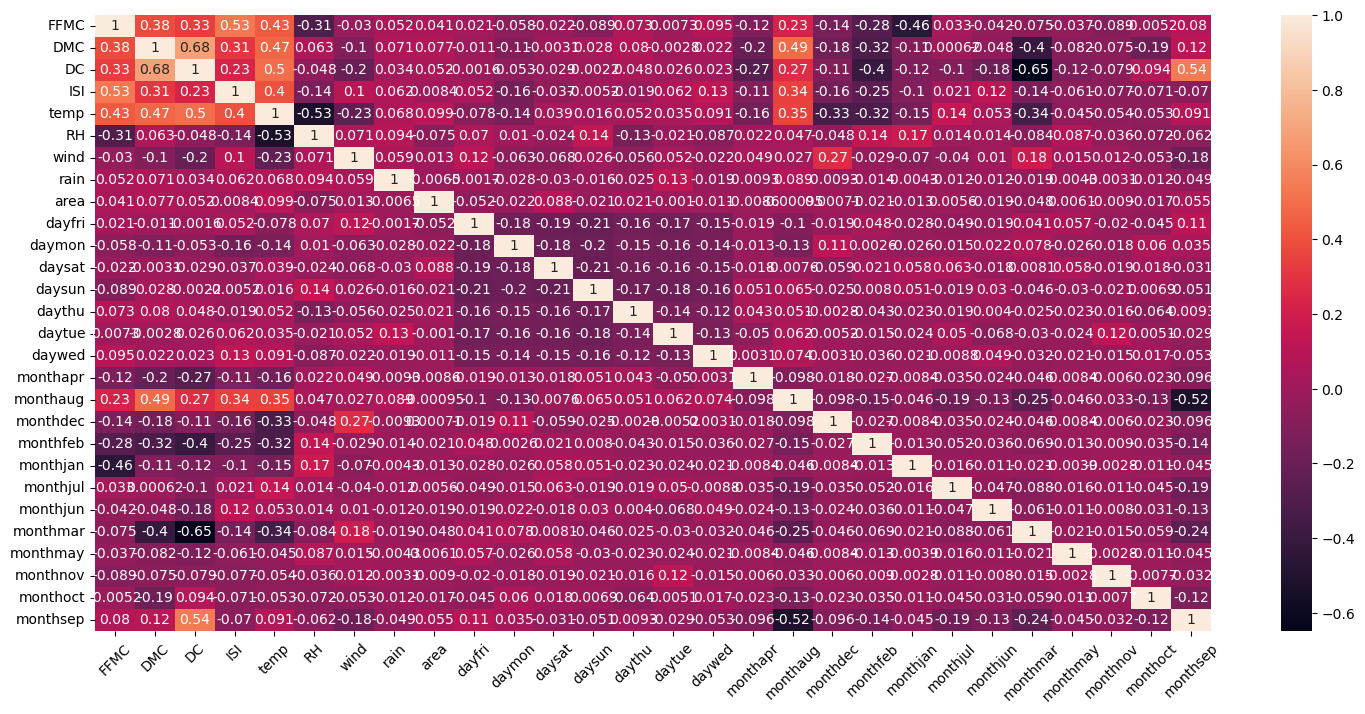

In [13]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)

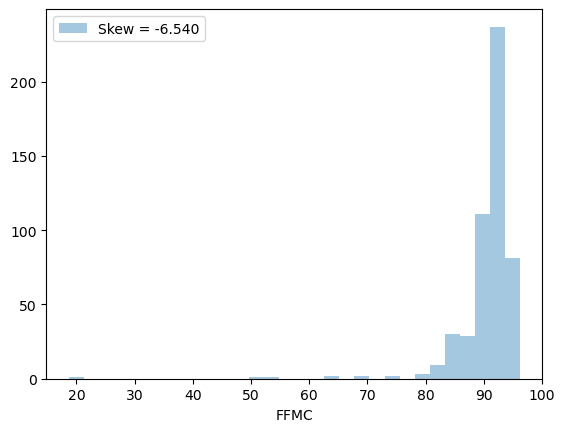

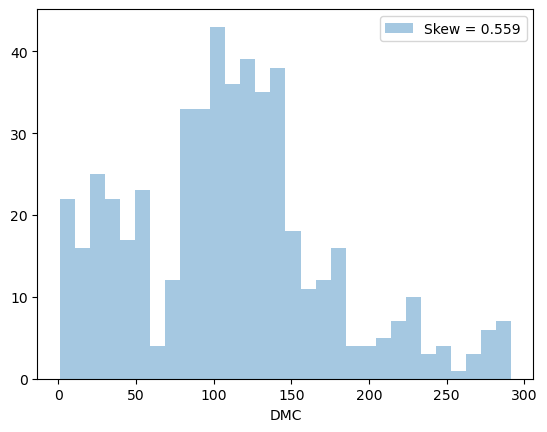

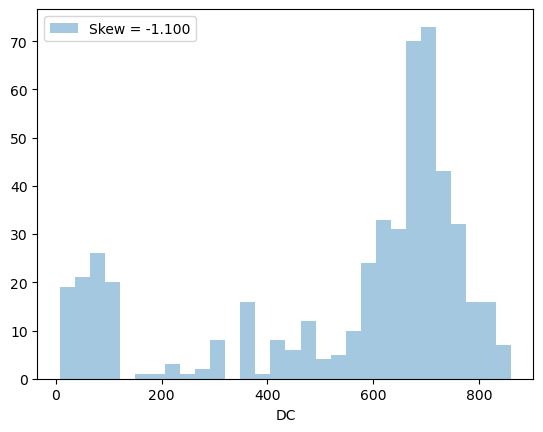

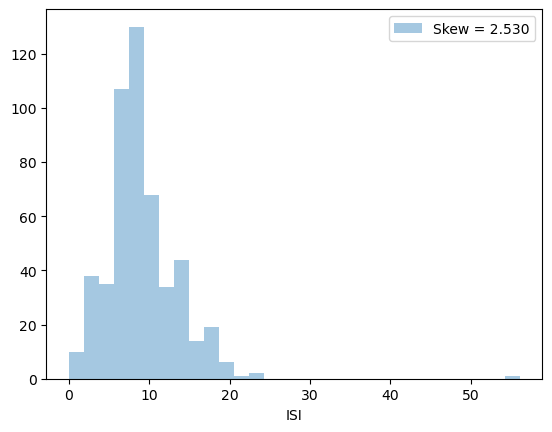

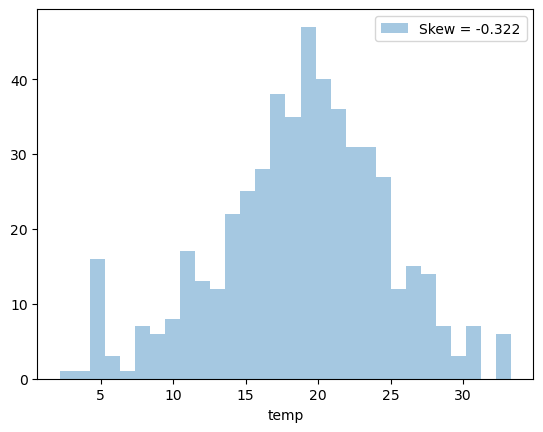

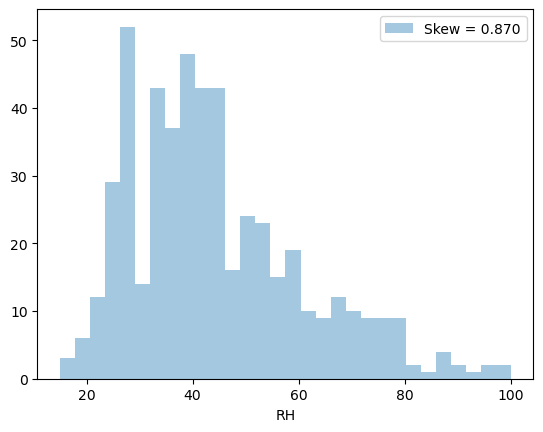

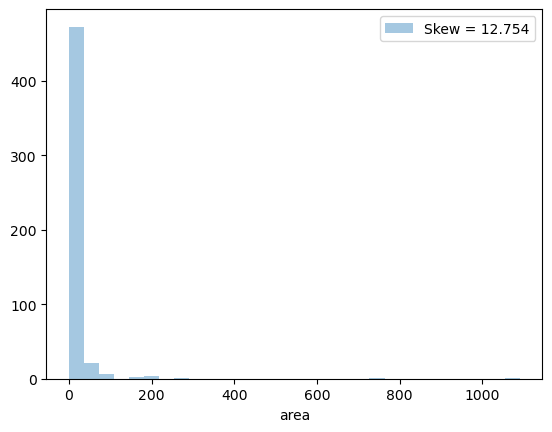

In [14]:
for feat in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

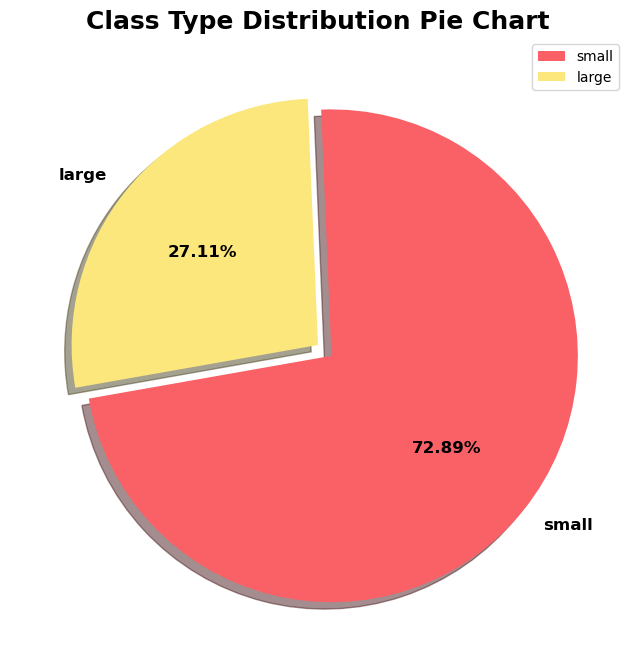

In [21]:
plt.figure(figsize = (12,8))
plt.pie(df['size_category'].value_counts(),
       labels=df.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [22]:
x=df.iloc[:,:28]
y=df.iloc[:,28]

In [23]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 509, dtype: object

In [25]:
scaler = MinMaxScaler()
model=scaler.fit(x)
scaled_data=model.transform(x)

In [26]:
#Splitting the data into x and y
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size = 0.25, stratify = y)

Applying grid searchcv to tune the gamma and kernel

In [27]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [28]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.1, 'gamma': 50, 'kernel': 'rbf'}, 0.7296896086369771)

Applying SVM algorithm with optimum values

In [29]:
clf = SVC(C= 13, gamma = 0.5)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 69.53125


array([[ 5, 30],
       [ 9, 84]], dtype=int64)